Our Zillow scenario continues:


As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the observations from 2017.


In these exercises, you will run through the stages of exploration as you continue to work toward the above goal.


1) As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2) Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.


In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import wrangle as w
import seaborn as sns
import explore as e

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [3]:
train, validate, test = w.wrangle_zillow()
train.shape, validate.shape, test.shape

((1178309, 8), (504990, 8), (420825, 8))

In [4]:
train.columns

Index(['bedrooms', 'bathrooms', 'total_sqft', 'tax_value', 'year_built',
       'taxamount', 'county', 'propertylandusetypeid'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178309 entries, 442389 to 2136927
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   bedrooms               1178309 non-null  Int64  
 1   bathrooms              1178309 non-null  float64
 2   total_sqft             1178218 non-null  Int64  
 3   tax_value              1178261 non-null  float64
 4   year_built             1177692 non-null  Int64  
 5   taxamount              1177005 non-null  float64
 6   county                 1178309 non-null  object 
 7   propertylandusetypeid  1178309 non-null  float64
dtypes: Int64(3), float64(4), object(1)
memory usage: 84.3+ MB


#### Only explore on train dataset!

3) Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [6]:
categorical = ['bedrooms' , 'bathrooms' , 'county']
continuous = ['total_sqft' , 'tax_value' , 'taxamount']

<AxesSubplot:xlabel='county', ylabel='tax_value'>

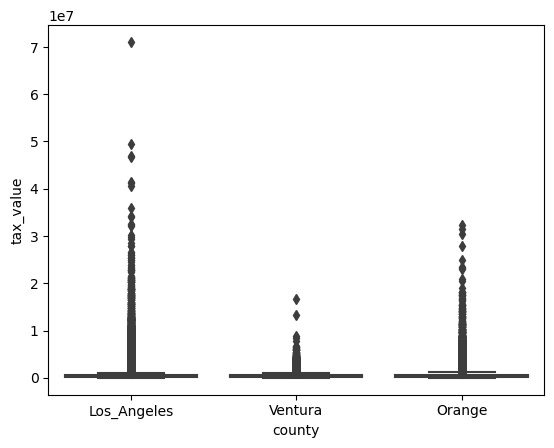

In [7]:
sns.boxplot(data=train, x= 'county', y= 'tax_value')

In [8]:
def plot_categorical_and_continuous_vars(df, categorical, continuous):
    for col in categorical:
        for col_2 in continuous:
            fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,6))
            fig.suptitle(f'{col} vs. {col_2}')
            sns.boxplot(data=df, x=col, y=col_2, ax=ax1)
            sns.barplot(data=df, x=col, y=col_2, ax=ax3)
            plt.show()


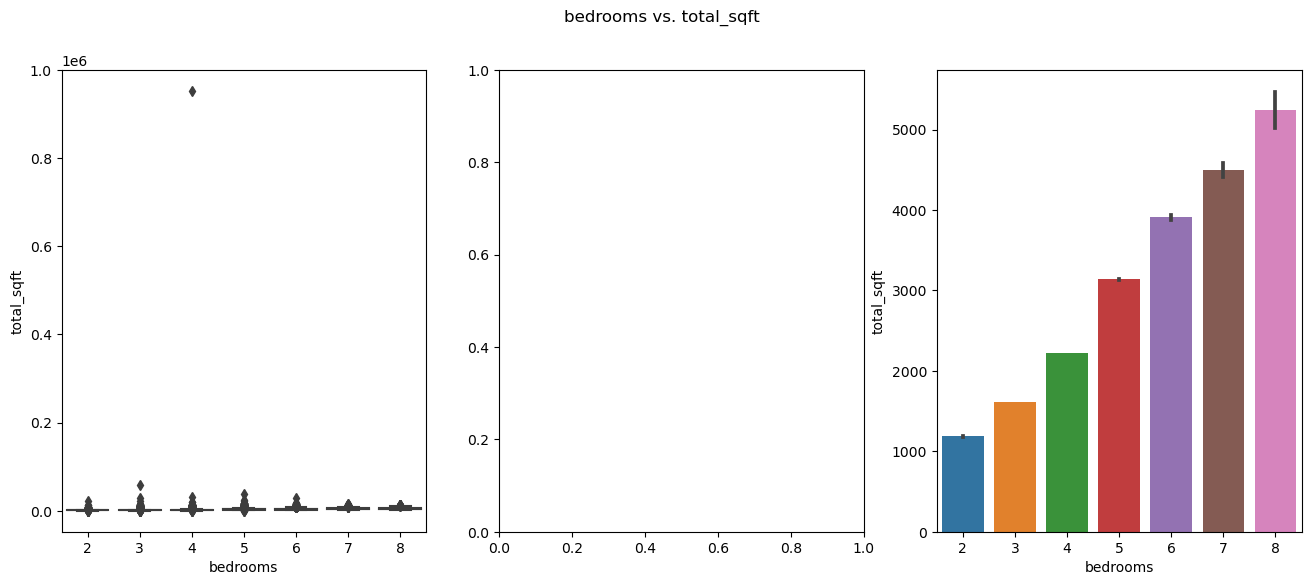

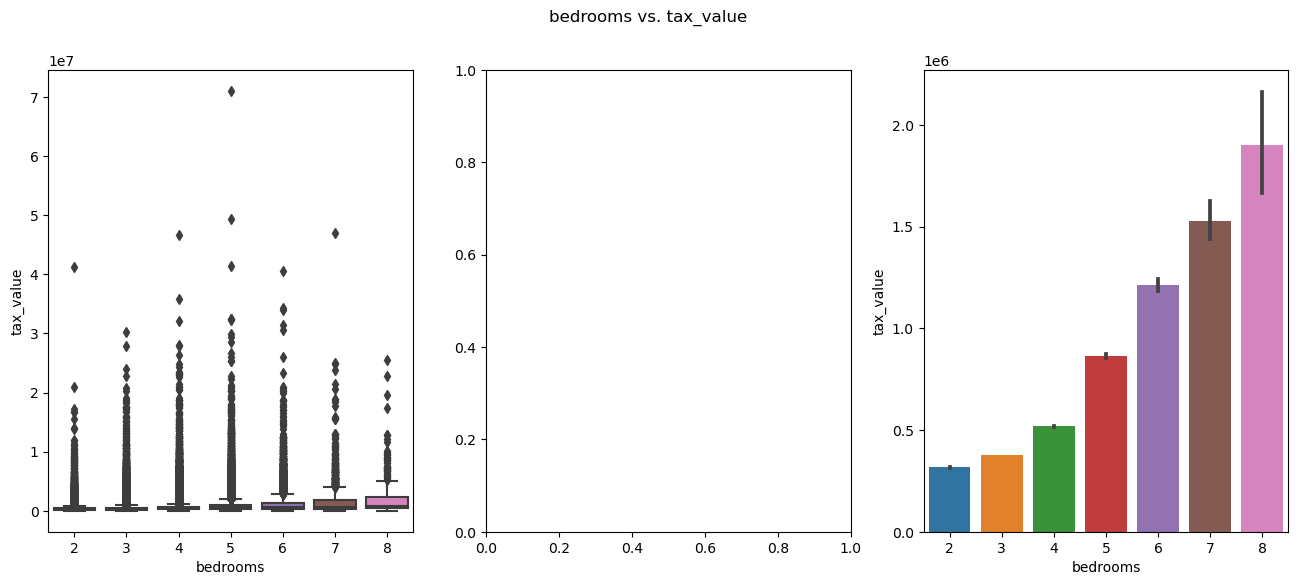

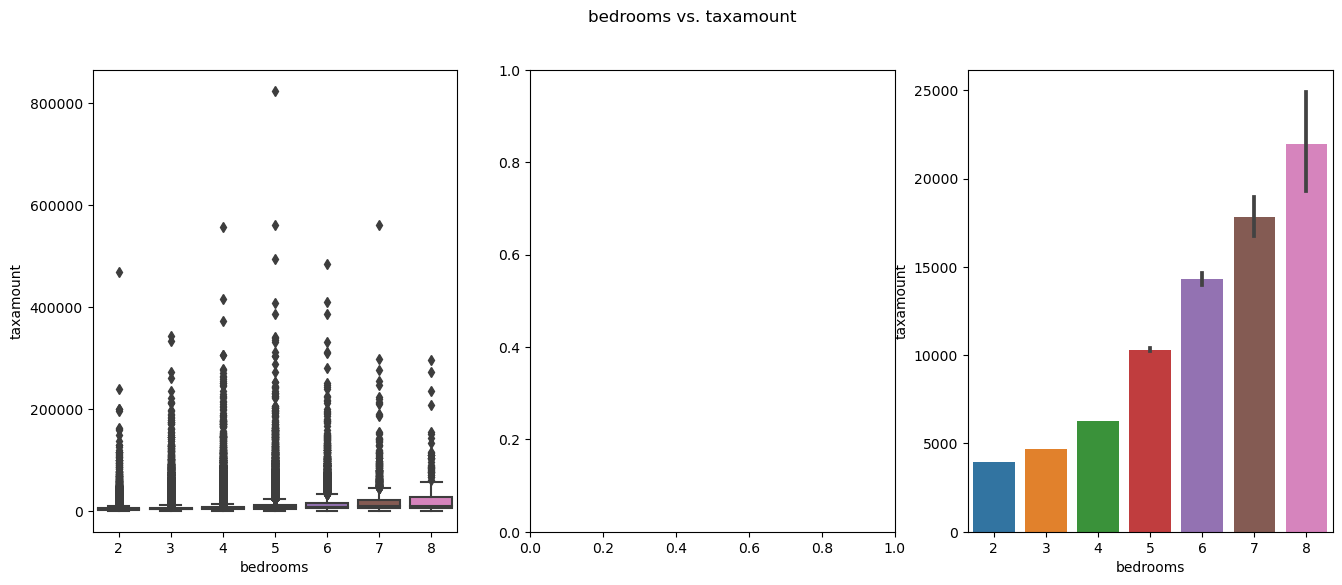

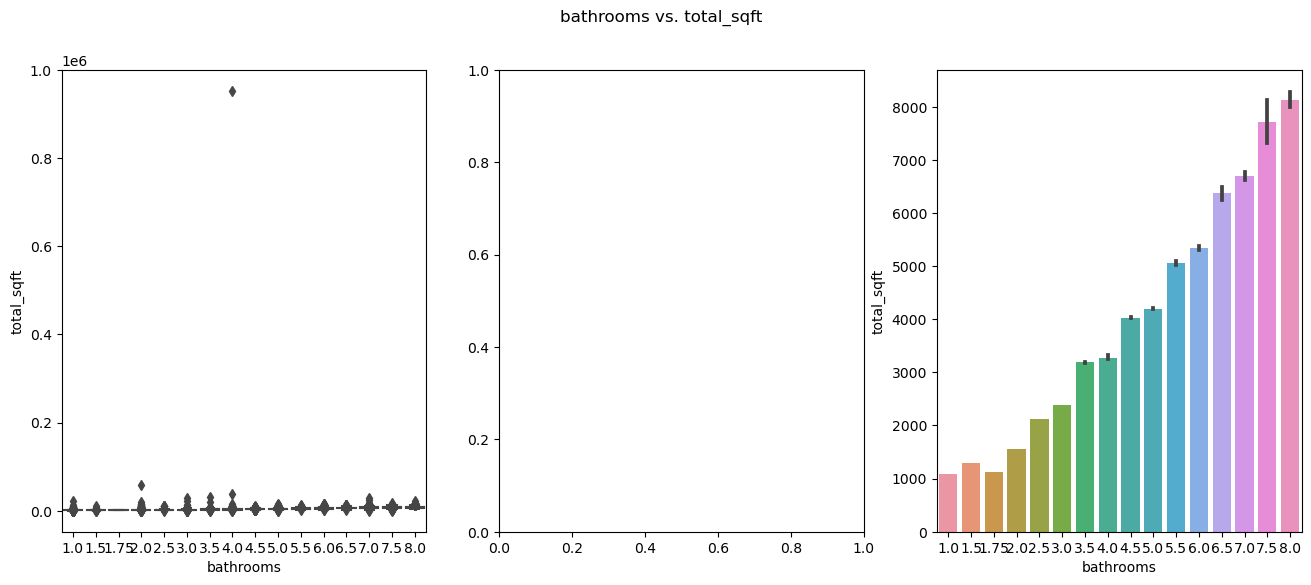

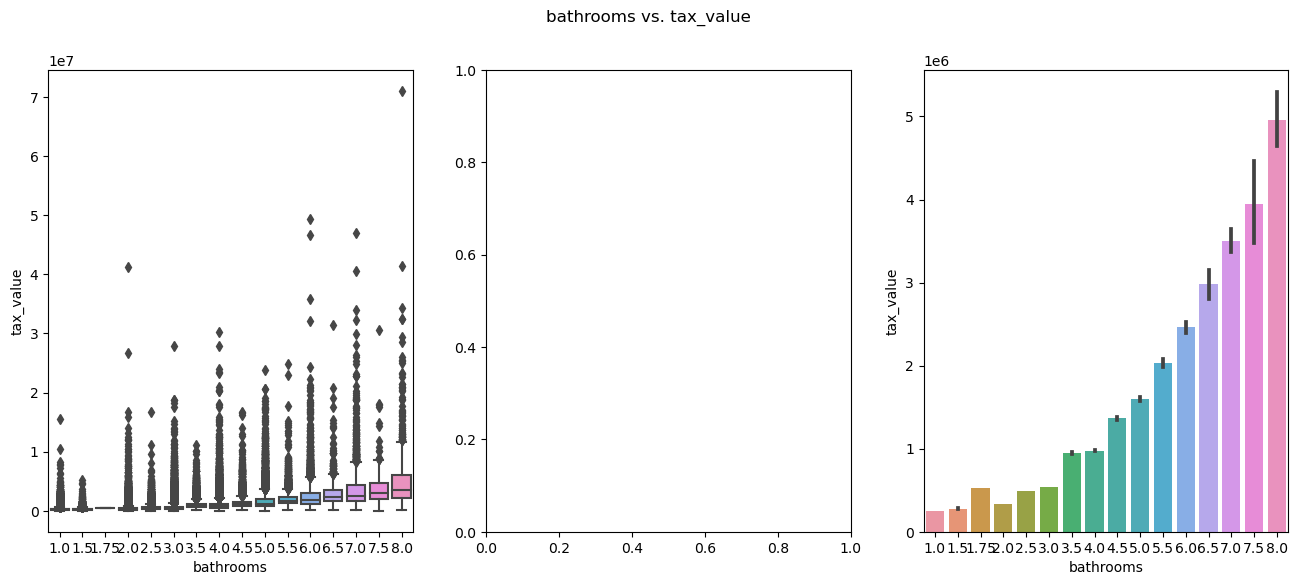

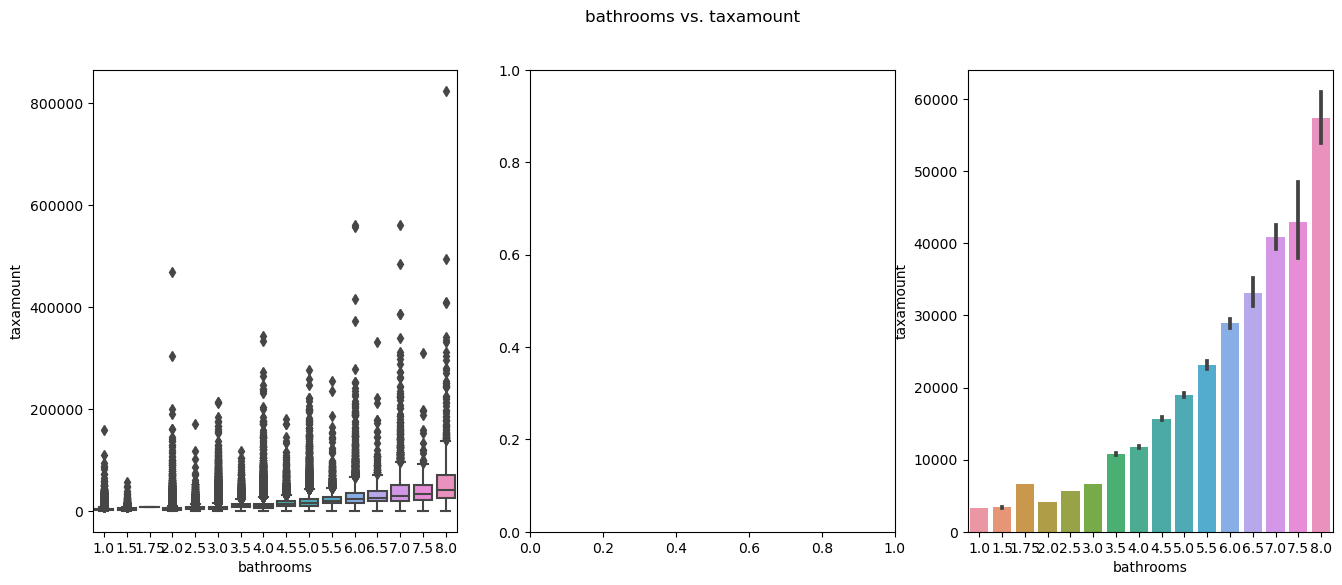

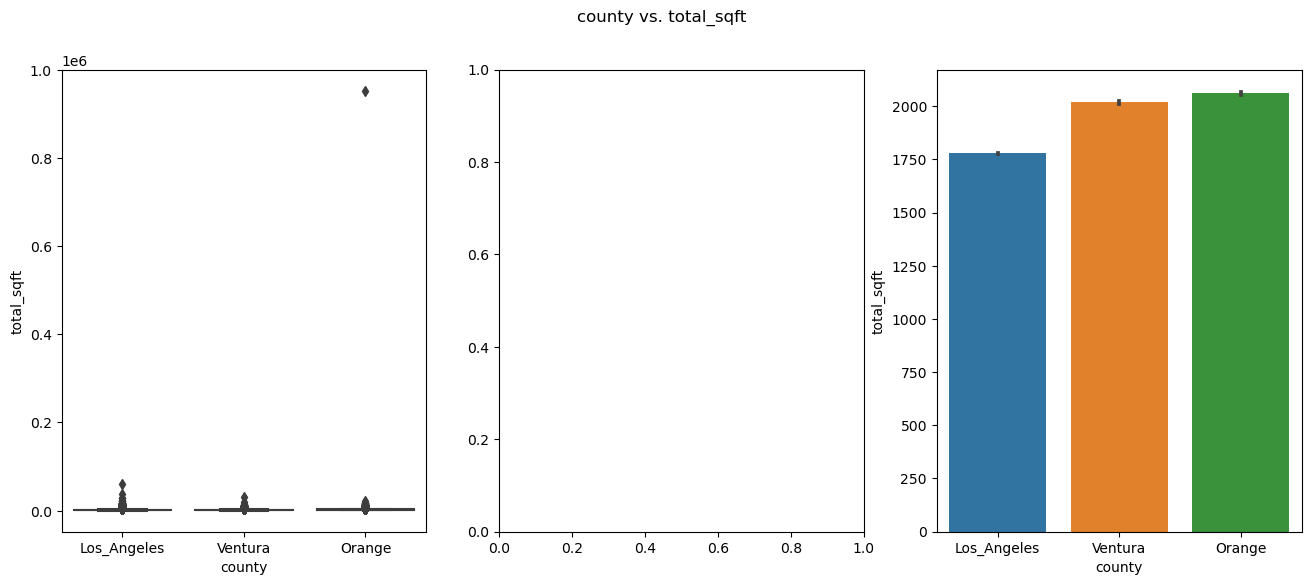

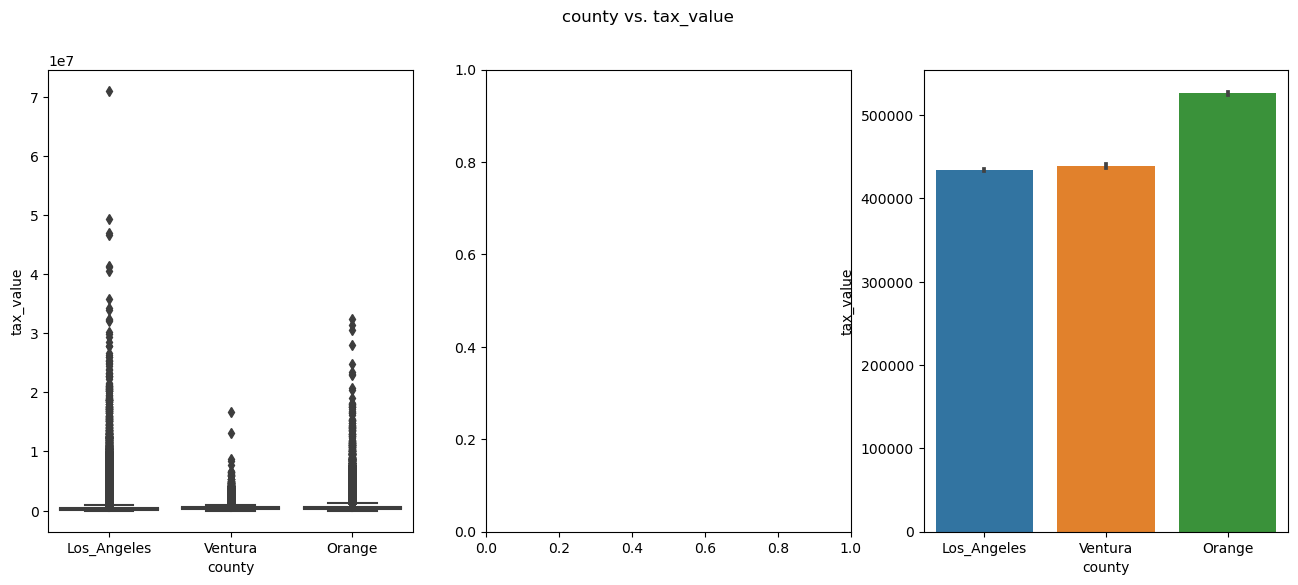

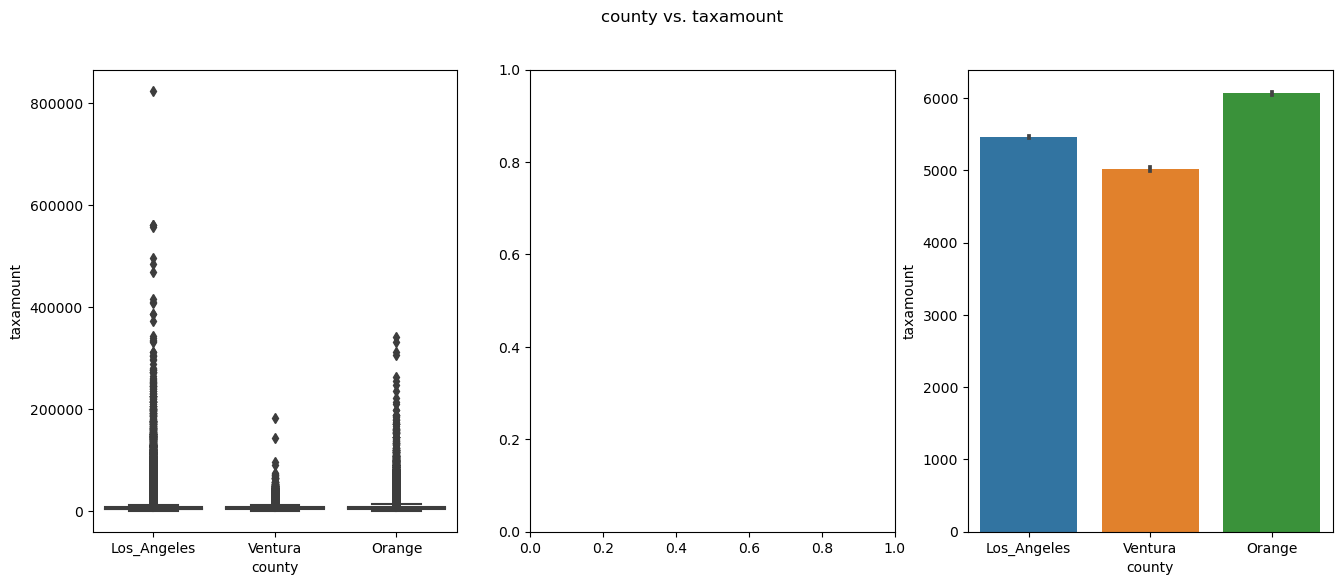

In [9]:
plot_categorical_and_continuous_vars(train, categorical, continuous)

4) Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

continuous to categorical plots:
- violin
- catplot
- sunburst
- boxplot
- swarmplot
- striplot

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1178309 entries, 442389 to 2136927
Data columns (total 8 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   bedrooms               1178309 non-null  Int64  
 1   bathrooms              1178309 non-null  float64
 2   total_sqft             1178218 non-null  Int64  
 3   tax_value              1178261 non-null  float64
 4   year_built             1177692 non-null  Int64  
 5   taxamount              1177005 non-null  float64
 6   county                 1178309 non-null  object 
 7   propertylandusetypeid  1178309 non-null  float64
dtypes: Int64(3), float64(4), object(1)
memory usage: 84.3+ MB


In [11]:
train.county.nunique()
#only 3 different fips?  should I remove this feature?

3


5) Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6) Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7) Come up with some initial hypotheses based on your goal of predicting property value.

8) Visualize all combinations of variables in some way.

9) Run the appropriate statistical tests where needed.

10) What independent variables are correlated with the dependent variable, home value?

11) Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12) Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13) Explore your dataset with any other visualizations you think will be helpful.

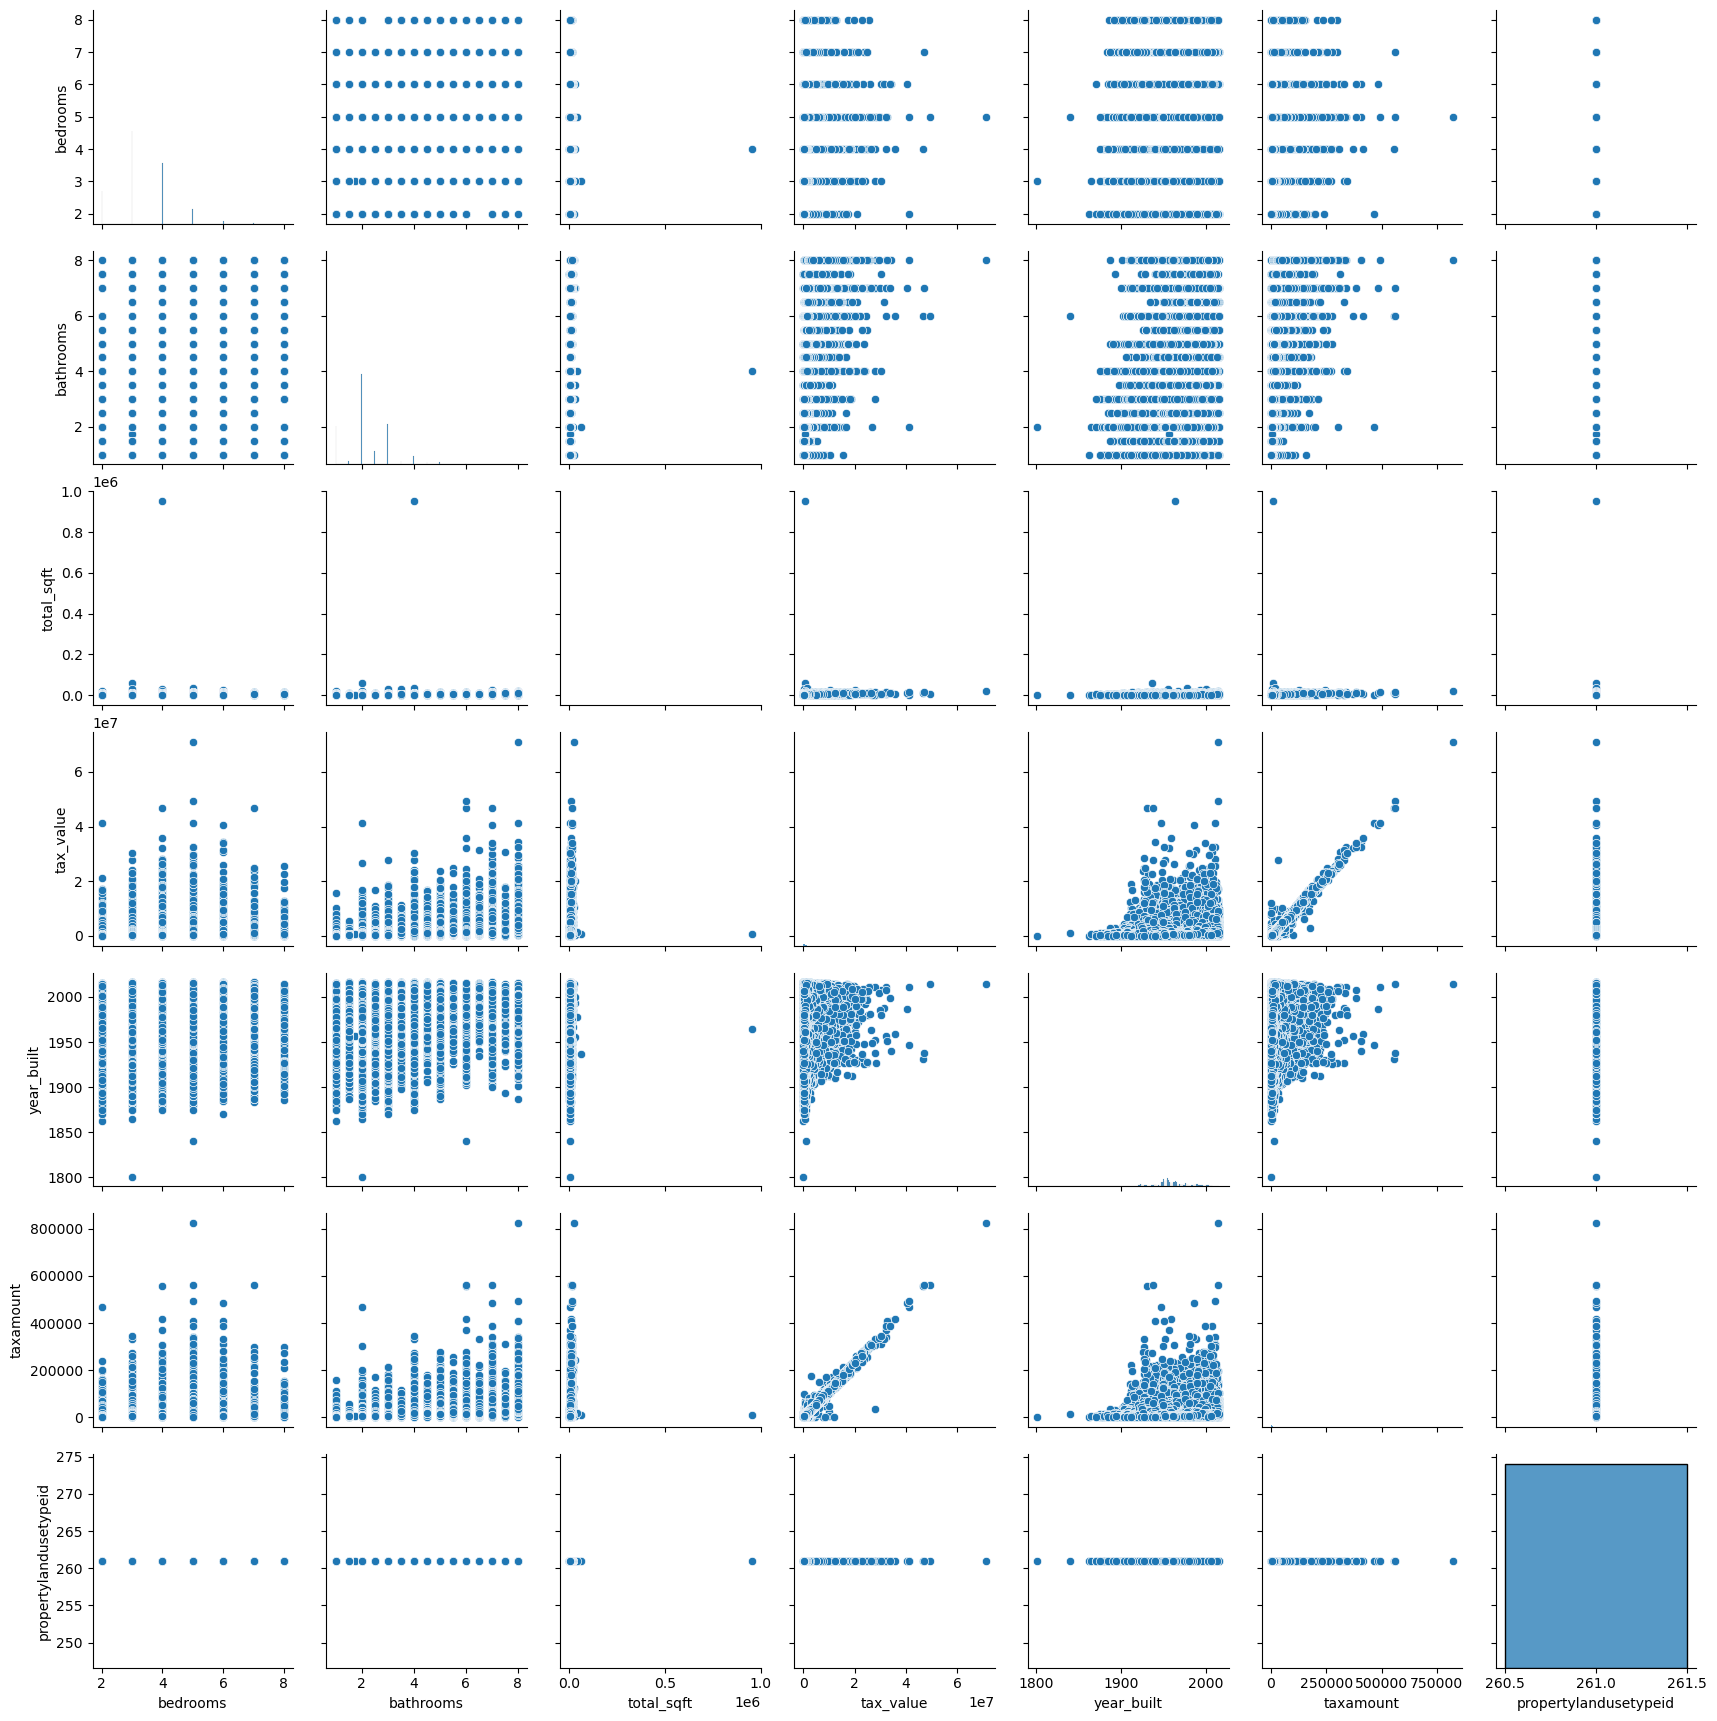

In [12]:
sns.pairplot(train)

<AxesSubplot:xlabel='county', ylabel='tax_value'>

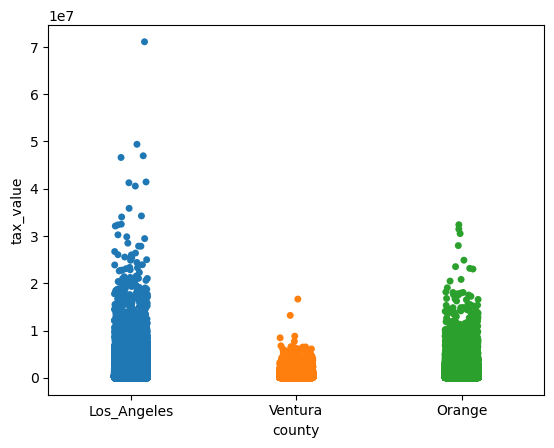

In [13]:
sns.stripplot(data= train, x = train.county, y= train.tax_value)

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

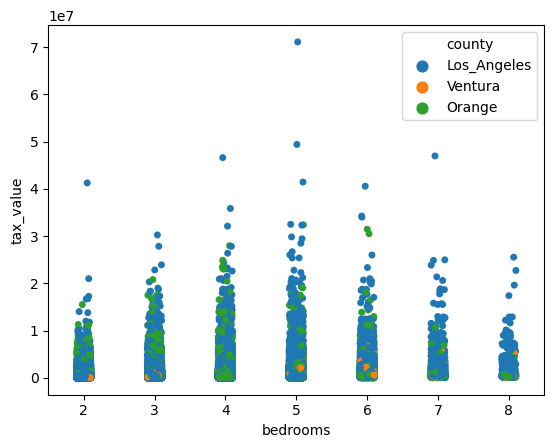

In [15]:
e.bedrooms_stripplot()

Number of bedrooms, number of bathrooms, and total square feet are all related to tax value.  They're also essentially related to eachother.  If you have more bedrooms and bathrooms, natually you would have more sqft.